## Linear models

In [1]:
import mglearn

w[0]: 0.393906  b: -0.031804


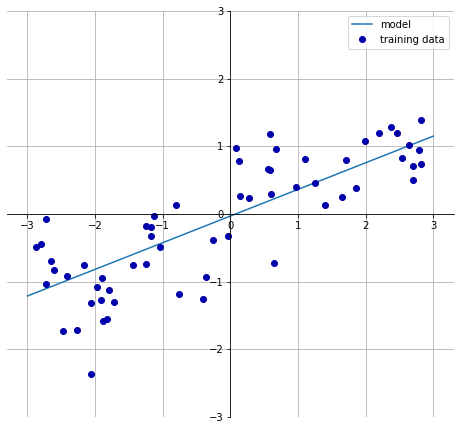

In [2]:
mglearn.plots.plot_linear_regression_wave()

The linear models such as regression work very well for multiple features. One might say that for a straight line (like above), all the minor details of the data are lost but which is true as regression models tend to generalise the predictions on the dataset. In case of many features, the model works very well.

#### Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x, y = mglearn.datasets.make_wave(n_samples=60)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [4]:
lr = LinearRegression().fit(x_train, y_train)

In [5]:
print("\nLR coefficient: {}".format(lr.coef_))


LR coefficient: [0.39390555]


In [6]:
print("\nLR intercept: {}".format(lr.intercept_))


LR intercept: -0.031804343026759746


Notice that intercept is a float number but the coefficient is a numpy array.

In [7]:
print("\nTraining set score: {:.2f}".format(lr.score(x_train, y_train)))
print("\nTest set score: {:.2f}".format(lr.score(x_test, y_test)))


Training set score: 0.67

Test set score: 0.66


As we can see that the accuracy is pretty bad but it is bad for both training as well as testing data. This implies we are underfitting and not overfitting. This is consistent to what was said earlier that this model generalises too much and does not fit very well with the training set as there is just 1 feature in this dataset.

In [8]:
x, y = mglearn.datasets.load_extended_boston()

C:\Users\eshub\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
lr = LinearRegression().fit(x_train, y_train)

In [10]:
print("\nTraining set score is {:.2f}".format(lr.score(x_train, y_train)))
print("\nTesting set score is {:.2f}".format(lr.score(x_test, y_test)))


Training set score is 0.95

Testing set score is 0.61


Here, we can see that the model is clearly overfitting.

#### Ridge regression

Ridge regression works on the principle that the weights of the features should be as low as possible thus decreasing the slope of the line while fitting well. This process of decreasing weights is called $regularization$.

In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(x_train, y_train)
print("\nTraining set accuracy is {:.2f}".
      format(ridge.score(x_train, y_train)))
print("\nTesting set accuracy is {:.2f}".
      format(ridge.score(x_test, y_test)))


Training set accuracy is 0.89

Testing set accuracy is 0.75


There is a parameters of Ridge also called $alpha$, whose value can be passed in the parentheses (default is 1.0). Increasing its value further forces the coefficients to zero which decreases training set performance. 

In [12]:
ridge10 = Ridge(10).fit(x_train, y_train)

print("\nTraining set accuracy is {:.2f}".
      format(ridge10.score(x_train, y_train)))
print("\nTesting set accuracy is {:.2f}".
      format(ridge10.score(x_test, y_test)))


Training set accuracy is 0.79

Testing set accuracy is 0.64


In [31]:
ridge10 = Ridge(0.1).fit(x_train, y_train)

print("\nTraining set accuracy is {:.2f}".
      format(ridge10.score(x_train, y_train)))
print("\nTesting set accuracy is {:.2f}".
      format(ridge10.score(x_test, y_test)))


Training set accuracy is 0.93

Testing set accuracy is 0.77


##### Analysing the coefficient value with changing alpha

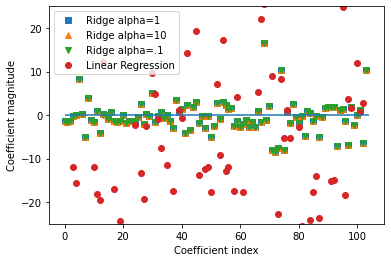

In [33]:
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 'v', label="Ridge alpha=.1")

plt.plot(lr.coef_, 'o', label="Linear Regression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()


C:\Users\eshub\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

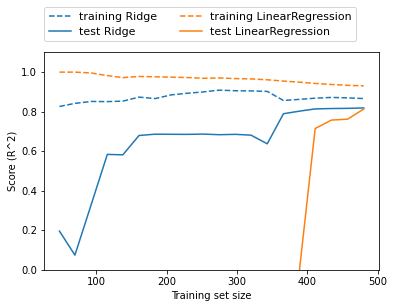

In [34]:
mglearn.plots.plot_ridge_n_samples()